# Single atom training
This notebook goes through the workflow of setting the hyperparameters, collecting atom manipulation data, and training the deep reinforcement learning agent.

### Importing modules

cpu
succeed to connect
succeed to connect
manipulation limit: [-20.21604347 -10.71604347 -53.79699516 -44.29699516]
Load cnn weight


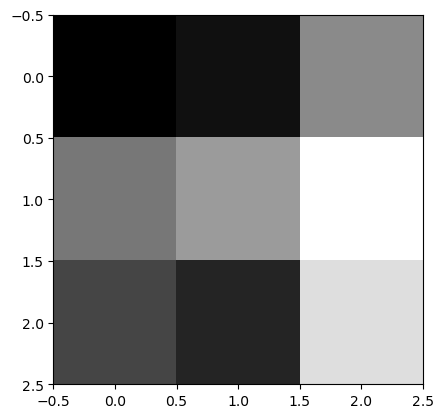

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import deque, namedtuple
from matplotlib import pyplot as plt, patches
import torch
from REACTRL import MoveEnv, RealExpEnv, Episode_Memory, Createc_Controller, sac_agent, ReplayMemory, HerReplayMemory, ddpg_agent
from REACTRL import plot_graph, show_reset, show_done, show_step, image_detect_edges, assign_mol_design, mol_property
matplotlib.rcParams['image.cmap'] = 'gray'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
from matplotlib import pyplot as plt, patches

# Python code to demonstrate namedtuple()
from collections import namedtuple

import cv2

import datetime
import pickle

from tqdm import tqdm
from scipy.spatial.distance import cdist


createc_controller = Createc_Controller(None, None, None, None)
img_forward = np.array(createc_controller.stm.scandata(1,4))
#TODO
#Set the pixel of the top-left corner, widht, and height of the anchor
#If the anchor is not used, just set w and h to a small number like below
top_left, w, h = (0,0), 3, 3
#template = img_forward[top_left[1]:top_left[1]+h, top_left[0]:top_left[0]+w]
#plt.imshow(template)

template = img_forward[top_left[1]:top_left[1]+h, top_left[0]:top_left[0]+w]
plt.imshow(template)



#TODO
diss_radius_nm = 0.6 #Set the radius of the manipulation start position relative the the atom start position
goal_nm  = 2 #Set the radius of the manipulation end position relative the the atom start position
step_nm = 0.4 #Set the step size in nm
max_diss_z_nm = 40 #Set the maximum z height in nm
min_diss_z_nm = 20 #Set the minimum z height in nm
max_mvoltage = 30 #Set the maximum bias voltage in mV 
max_pcurrent = 1000 #Set the maximum conductance in pA/mV
max_len = 5 #Set maximum episode length
template_max_y = 3 #Set the maximum or minimum row number to search for anchor
#Set the path to load CNN weight for the atom movement classifier
# CNN_weight_path = 'C:/Users/wun2/github/reaction_rl/training_data_and_model_parameters/model parameters/_atom_move_detector_conv_2740.pth'
# current_jump  = 4 #Set the current jump gradient/ std(current) threshold required to take STM scan

CNN_weight_path = 'C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/reaction_rl/training_data_and_model_parameters/model parameters/_atom_move_detector_conv_2740.pth'
current_jump  = 4 #Set the current jump gradient/ std(current) threshold required to take STM scan


#Set STM scan parameters
pixel = 128
im_size_nm = 10 #Image size in nm 
scan_mV = 1000 #bias voltage
x_nm, y_nm = createc_controller.get_offset_nm()
offset_nm = np.array([x_nm, y_nm]) #Set offset to current offset value

#Set manipulation parameters to pull atoms from image edge to center
pull_back_mV = 5 #bias in mV
pull_back_pA = 60000 #current in pA

#Set manipulation limit [left, right, up, down] in nm
manip_limit_nm = np.array([x_nm - 0.5*im_size_nm+0.25, x_nm + 0.5*im_size_nm-0.25, y_nm+0.25, y_nm+im_size_nm-0.25])

env = MoveEnv(diss_radius_nm=diss_radius_nm,
                    step_nm=step_nm,
                    goal_nm=goal_nm,
                    max_diss_z_nm=max_diss_z_nm,
                    min_diss_z_nm=min_diss_z_nm,
                    max_mvoltage=max_mvoltage,
                    max_pcurrent=max_pcurrent,
                    max_len=max_len,
                    template=template,
                    template_max_y=template_max_y,
                    load_weight=CNN_weight_path,
                    current_jump=current_jump,
                    pixel=pixel,
                    im_size_nm=im_size_nm,
                    scan_mV=scan_mV,
                    offset_nm=offset_nm,
                    pull_back_mV=pull_back_mV,
                    pull_back_pA=pull_back_pA,
                    manip_limit_nm=manip_limit_nm,
)


#TODO
batch_size= 32  # 128 #Set minibatch size
LEARNING_RATE = 0.0003 #Set learning rate

#Set the action space range
ACTION_SPACE = namedtuple('ACTION_SPACE', ['high', 'low'])
action_space = ACTION_SPACE(high = torch.tensor([1,1,1,1,1,1]), low = torch.tensor([-1,-1,-1, -1, 1/3,1/2]))

#Initialize the soft actor-critic agent
alpha = 1.0
# agent = sac_agent(num_inputs = 4, num_actions = 4, action_space = action_space, device=device, hidden_size=256, lr=LEARNING_RATE,
#                   gamma=0.9, tau=0.005, alpha=alpha)

agent = ddpg_agent(num_inputs = 4, num_actions = 6, device=device, hidden_size=256, lr=LEARNING_RATE,gamma=0.9, tau=0.005)



#TODO
replay_size=1000000 #Set memory size

memory = HerReplayMemory(replay_size, env, strategy = 'future')


episode_memory = Episode_Memory()
#TODO
#Set the folder name to store training data and neural network weight
folder_name =  'C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/test_nian_ddpg_new_cnn'


c_k_min = 500
eta = 0.994
max_ep_len = max_len


episode_rewards, alphas, precisions, episode_lengths = [], [], [], []
avg_episode_rewards, avg_alphas, avg_precisions, avg_episode_lengths = [], [], [], []

max_steps = 10
num_episodes = 1000
episode_start = 0


i_episode=0
episode_reward, episode_steps = 0, 0
done = False
check_similarity=None
candidate_mols=None


In [ ]:
data=env.reset(scan_len_nm_small=10, find_mol=True, scan_speed=600)

In [ ]:
# movement 

In [ ]:
import numpy as npa
list(np.random.random(2)*2-1)+list(np.random.random(2)*2-1)+list(np.random.random(2))

In [ ]:
env.mol_current_absolute_nm=np.array([120, 35])

In [ ]:
env.createc_controller.get_offset_nm()

In [ ]:
env.manip_limit_nm

In [ ]:
env.manip_limit_nm

In [ ]:
env.action_to_latman_input(np.array([-0.7559753994373559,
 -0.7531843839187069,
 -0.7037574602629963,
 0.8244968531560448,
 0.04043179568928856,
 0.8012815662805606]))

In [3]:
env.createc_controller.get_offset_nm()

(-15.46554946899414, -54.045372009277344)

In [4]:
action = env.random_action_generator()
print('action', action)
print('mol_current_absolute_nm', env.mol_current_absolute_nm)

action [-0.39001098485528773, -0.7281770777026164, -0.011084996559140636, 0.9700680946896747, 0.16432195310191688, 0.6572469506072091]
mol_current_absolute_nm [-15.56 -48.  ]


In [5]:
env.action_to_latman_input(action)

mol_position: [-15.56 -48.  ]


(-15.716004393942116,
 -48.29127083108105,
 -15.582169993118281,
 -46.05986381062065,
 4.929658593057507,
 657.2469506072091)

In [6]:
current_time='11_21_19_0'
num_episodes=100
episode_start=0
done_num=0
new_mol=True
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    if new_mol:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=True, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    else:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=False, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    current_time=env.get_state_current_time
    # episode_memory.update_memory_reset(env.img_info, i_episode, info)


    for step in range(max_steps):
        action = env.random_action_generator()
        print('action', action)
        print('mol_current_absolute_nm', env.mol_current_absolute_nm)
        next_state, reward, done, info, new_mol = env.step(action, all_file_label=str(i_episode)+'_'+str(step),current_time=current_time, check_similarity=check_similarity, candidate_mols=candidate_mols)
        print('episode: %s reward: %s done: %s state: %s next_state: %s' % (str(i_episode)+'_'+str(step), reward, done, state, next_state))
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        # memory.push(state,action,reward,next_state,mask)
        # episode_memory.update_memory_step(state, action, next_state, reward, done, info)

        if done:
            done_num+=1
            # episode_memory.update_memory_done(env.img_info, [env.mol_center_x_nm, env.mol_center_y_nm], [0.0, 0.0])
            # episode_memory.update_memory_done(env.img_info)
            # episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:
            state = next_state
            #state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode)+str(step),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
        if new_mol:
            break

    # if done_num>1:   
    #     if (len(memory)>batch_size):
    #         episode_K = int(episode_steps)
    #         for k in range(episode_K):
    #             c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
    #             agent.update_parameters(memory, batch_size, c_k)
    
    # episode_rewards.append(episode_reward)
    # alphas.append(agent.alpha.item())
    # with open('episode_reward_1109_random.txt', 'a') as fp:
    #     fp.write('%s, %.2f, %.2f\n' % (i_episode, episode_reward, episode_steps))
    # plt.scatter(i_episode, episode_reward, c='b')
    

    # episode_lengths.append(episode_steps)
    # avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    # avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    # avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))

Episode: 0
The scan will take 31.5 seconds
action [0.2890146378990057, -0.06057793540047429, -0.4102782358517072, 0.6869478818380559, 0.3342003945172388, 0.10601736281201335]
mol_current_absolute_nm [-15.54 -47.94]
mol_position: [-15.54 -47.94]
args (-15.424394144840397, -47.96423117416019, -16.360556471703415, -46.56610423632389, 10.026011835517165, 106.01736281201335)
pos (-15.424394144840397, -47.96423117416019, -16.360556471703415, -46.56610423632389) params (10.026011835517165, 106.01736281201335, array([-15.46505547, -54.04374886]), 9.9365234375)
args (65, 78, 52, 96)
Epoch 0_0 scan a image after dissociating now....
The scan will take 31.5 seconds
area 2.752685546875
episode: 0_0 reward: 0.0 done: False state: [ 0.90091352 -0.43399865  0.          0.          0.62        0.70666667
  0.77916667  0.76293945] next_state: [ 0.90091352 -0.43399865 -0.105       0.14        0.55        0.72333333
  0.70327778  0.68817139]
action [0.8377697176679211, -0.9152157627807675, 0.016308842063

In [ ]:
current_time=None
num_episodes=200
episode_start=0
done_num=0
new_mol=False
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    if new_mol:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=True, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    else:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=False, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    current_time=env.get_state_current_time
    episode_memory.update_memory_reset(env.img_info, i_episode, info)


    for step in range(max_steps):
        if i_episode<6:
            action = env.random_action_generator()
        else:
            action = agent.select_action(state)
            action = list(np.array(action)[:2]*2-1)+list(np.array(action)[2:])
        print('state:', state)
        print('action:', action)
        next_state, reward, done, info, new_mol = env.step(action, all_file_label=str(i_episode)+'_'+str(step),current_time=current_time, check_similarity=check_similarity, candidate_mols=candidate_mols)
        print('episode: %s reward: %s done: %s state: %s next_state: %s' % (str(i_episode)+'_'+str(step), reward, done, state, next_state))
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        memory.push(state,action,reward,next_state,mask)
        episode_memory.update_memory_step(state, action, next_state, reward, done, info)

        if done:
            done_num+=1
            # episode_memory.update_memory_done(env.img_info, [env.mol_center_x_nm, env.mol_center_y_nm], [0.0, 0.0])
            episode_memory.update_memory_done(env.img_info)
            episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:
            state = next_state
            #state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode)+str(step),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
        if new_mol:
            break

        if (len(memory)>batch_size):
            episode_K = int(episode_steps)
            for k in range(episode_K):
                c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
                agent.update_parameters(memory, batch_size, c_k)


    # if done_num>1:   
    #     if (len(memory)>batch_size):
    #         episode_K = int(episode_steps)
    #         for k in range(episode_K):
    #             c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
    #             agent.update_parameters(memory, batch_size, c_k)
    
    episode_rewards.append(episode_reward)

    with open('episode_reward_1116.txt', 'a') as fp:
        fp.write('%s, %.2f, %.2f\n' % (i_episode, episode_reward, episode_steps))
    plt.scatter(i_episode, episode_reward, c='b')
    

    episode_lengths.append(episode_steps)
    avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
    

        
    if (i_episode)%5 == 0:
        agent.save_model(filename='ddpg_%s' % i_episode)


In [ ]:
action=np.array([0.00, 0.00, -0.89982123, 0.60377552, 0.99957592,
       0.9587658 ])

In [ ]:
env.step(np.array([0.00, 0.00, -0.9982123, 0.8377552, 0.99957592,
       0.9587658 ]),scan_len_nm_small=10)

In [ ]:
env.get_state(new_scan_region=True)


In [ ]:
save_img_before='C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/reaction_rl/all_output/lateral_mani_11_20_14_50/scan_img_before_11_20_14_50'
all_file_label='example'
img_small=cv2.imread('%s/img_forward_%s.png' % (save_img_before, all_file_label), cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(img_small)

In [ ]:
env.createc_controller.get

In [ ]:
env.get_state(new_scan_region=True)

In [ ]:
img_prop_small.select_points(dist_thres=7.0)

In [ ]:
env.createc_controller.get_offset_nm()

In [ ]:
img_prop_small=mol_property(img_small, offset_x_nm=97.64899635314941, offset_y_nm=0.647003173828125, len_nm=30)

In [ ]:
env.mol_start_absolute_nm

In [ ]:
img_prop_small.center_points_from_contour()
img_prop_small.plot_contour(text=True)

In [ ]:
env.mol_current_absolute_nm

In [ ]:
data=env.reset(scan_len_nm_small=10, find_mol=True, scan_speed=600)

In [ ]:
data=env.reset(scan_len_nm_small=30, find_mol=True, scan_speed=600)

In [ ]:
env.mol_current_absolute_nm

In [ ]:
env.step_latman(74.338839702451288,
 2.3108835237947,
 75.68313324741355,
 3.005737202191265,
 30.161320594912027,
 1009.9082504127797)

In [ ]:
action=np.random.random(6)

In [ ]:
action

In [ ]:
env.step_nm=0.4

In [ ]:
env.createc_controller.stm.getparam("Latmangain")

In [ ]:
preamp_grain = 10**float(env.createc_controller.stm.getparam("Latmangain"))

In [ ]:
preamp_grain

In [ ]:
env.mol_current_absolute_nm

In [ ]:
env.manip_limit_nm

In [ ]:
env.createc_controller.get_len_nm()

In [ ]:
env.createc_controller.get_offset_nm()

In [ ]:
env.action_to_latman_input(action)

In [ ]:
env.step_latman(76.008839702451288,
 6.4708835237947,
 74.68313324741355,
 7.005737202191265,
 30.161320594912027,
 1009.9082504127797)

In [ ]:
img_path='C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/reaction_rl/all_output/vertmani_11_13_15_46/scan_img_after_11_13_15_46/img_forward_8_0.png'
img=cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:
plt.imshow(img)

In [ ]:
env.detect_mol_cnn(img)

In [ ]:
img_path='C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/reaction_rl/all_output/get_new_region_11_16_15_8/scan_img_before_11_16_15_8/img_forward_0_7_1.png'
img=cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:
from REACTRL import scan_all_approach_area

In [ ]:
scan_all_approach_area(env, plot_scan_points=False)

In [ ]:
mol_center_x_nm, mol_center_y_nm, check_similarity, candidate_mols=env.get_state(x_nm=env.createc_controller.get_offset_nm()[0], y_nm=env.createc_controller.get_offset_nm()[1], scan_len_nm_large=20, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols,  current_time=None, img_name='abc', data_name='abc')

In [ ]:
current_time='11_10_15_49'
num_episodes=500
episode_start=8
done_num=0
new_mol=True
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    if new_mol:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=True, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    else:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=False, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    current_time=env.get_state_current_time
    episode_memory.update_memory_reset(env.img_info, i_episode, info)


    for step in range(max_steps):
        action = env.random_action_generator()
        next_state, reward, done, info, new_mol = env.step(action, all_file_label=str(i_episode)+'_'+str(step),current_time=current_time, check_similarity=check_similarity, candidate_mols=candidate_mols)
        print('episode: %s reward: %s done: %s state: %s next_state: %s' % (str(i_episode)+'_'+str(step), reward, done, state, next_state))
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        # memory.push(state,action,reward,next_state,mask)
        # episode_memory.update_memory_step(state, action, next_state, reward, done, info)

        if done:
            done_num+=1
            # episode_memory.update_memory_done(env.img_info, [env.mol_center_x_nm, env.mol_center_y_nm], [0.0, 0.0])
            # episode_memory.update_memory_done(env.img_info)
            # episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:
            state = next_state
            #state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode)+str(step),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
        if new_mol:
            break

    # if done_num>1:   
    #     if (len(memory)>batch_size):
    #         episode_K = int(episode_steps)
    #         for k in range(episode_K):
    #             c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
    #             agent.update_parameters(memory, batch_size, c_k)
    
    # episode_rewards.append(episode_reward)
    # alphas.append(agent.alpha.item())
    with open('episode_reward_1109_random.txt', 'a') as fp:
        fp.write('%s, %.2f, %.2f\n' % (i_episode, episode_reward, episode_steps))
    plt.scatter(i_episode, episode_reward, c='b')
    

    # episode_lengths.append(episode_steps)
    # avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    # avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    # avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
    

        
    # if (i_episode)%5 == 0:
    #     torch.save(agent.critic.state_dict(), '{}/_critic_{}.pth'.format(folder_name,i_episode))
    #     torch.save(agent.policy.state_dict(), '{}/_policy_{}.pth'.format(folder_name,i_episode))
    #     torch.save(agent.alpha, '{}/_alpha_{}.pth'.format(folder_name,i_episode))
        # torch.save(env.atom_move_detector.conv.state_dict(), '{}/_atom_move_detector_conv_{}.pth'.format(folder_name,i_episode))

# reinforcement learning traning mode (ddpg)

In [ ]:
agent.actor

In [ ]:
agent.critic

In [ ]:
np.array([0.0, 3.0, 1.0, 0.0])[: 2]

In [ ]:
current_time=None
num_episodes=200
episode_start=0
done_num=0
new_mol=False
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    if new_mol:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=True, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    else:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=False, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    current_time=env.get_state_current_time
    episode_memory.update_memory_reset(env.img_info, i_episode, info)


    for step in range(max_steps):
        if i_episode<6:
            action = env.random_action_generator()
        else:
            action = agent.select_action(state)
            action = list(np.array(action)[:2]*2-1)+list(np.array(action)[2:])
        print('state:', state)
        print('action:', action)
        next_state, reward, done, info, new_mol = env.step(action, all_file_label=str(i_episode)+'_'+str(step),current_time=current_time, check_similarity=check_similarity, candidate_mols=candidate_mols)
        print('episode: %s reward: %s done: %s state: %s next_state: %s' % (str(i_episode)+'_'+str(step), reward, done, state, next_state))
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        memory.push(state,action,reward,next_state,mask)
        episode_memory.update_memory_step(state, action, next_state, reward, done, info)

        if done:
            done_num+=1
            # episode_memory.update_memory_done(env.img_info, [env.mol_center_x_nm, env.mol_center_y_nm], [0.0, 0.0])
            episode_memory.update_memory_done(env.img_info)
            episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:
            state = next_state
            #state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode)+str(step),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
        if new_mol:
            break

        if (len(memory)>batch_size):
            episode_K = int(episode_steps)
            for k in range(episode_K):
                c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
                agent.update_parameters(memory, batch_size, c_k)


    # if done_num>1:   
    #     if (len(memory)>batch_size):
    #         episode_K = int(episode_steps)
    #         for k in range(episode_K):
    #             c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
    #             agent.update_parameters(memory, batch_size, c_k)
    
    episode_rewards.append(episode_reward)

    with open('episode_reward_1116.txt', 'a') as fp:
        fp.write('%s, %.2f, %.2f\n' % (i_episode, episode_reward, episode_steps))
    plt.scatter(i_episode, episode_reward, c='b')
    

    episode_lengths.append(episode_steps)
    avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
    

        
    if (i_episode)%5 == 0:
        agent.save_model(filename='ddpg_%s' % i_episode)


# reinforcement learning traning mode (sac)

In [ ]:
current_time=None
num_episodes=1000
episode_start=0
done_num=0
new_mol=False
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    if new_mol:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=True, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    else:
        state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode),current_time=current_time, find_mol=False, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    current_time=env.get_state_current_time
    episode_memory.update_memory_reset(env.img_info, i_episode, info)


    for step in range(max_steps):
        if i_episode<6:
            action = env.random_action_generator()
        else:
            action = agent.select_action(state)

        print('state:', state)
        print('action:', action)

        next_state, reward, done, info, new_mol = env.step(action, all_file_label=str(i_episode)+'_'+str(step),current_time=current_time, check_similarity=check_similarity, candidate_mols=candidate_mols)
        print('episode: %s reward: %s done: %s state: %s next_state: %s' % (str(i_episode)+'_'+str(step), reward, done, state, next_state))
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        memory.push(state,action,reward,next_state,mask)
        episode_memory.update_memory_step(state, action, next_state, reward, done, info)

        if done:
            done_num+=1
            # episode_memory.update_memory_done(env.img_info, [env.mol_center_x_nm, env.mol_center_y_nm], [0.0, 0.0])
            episode_memory.update_memory_done(env.img_info)
            episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:
            state = next_state
            #state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i_episode)+str(step),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
        if new_mol:
            break

 
        if (len(memory)>batch_size):
            episode_K = int(episode_steps)
            for k in range(episode_K):
                c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
                agent.update_parameters(memory, batch_size, c_k)

    # if done_num>1:   
    #     if (len(memory)>batch_size):
    #         episode_K = int(episode_steps)
    #         for k in range(episode_K):
    #             c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
    #             agent.update_parameters(memory, batch_size, c_k)
    
    episode_rewards.append(episode_reward)
    alphas.append(agent.alpha.item())
    with open('episode_reward_110713_sac.txt', 'a') as fp:
        fp.write('%s, %.2f, %.2f\n' % (i_episode, episode_reward, episode_steps))
    plt.scatter(i_episode, episode_reward, c='b')
    

    episode_lengths.append(episode_steps)
    avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
    

        
    if (i_episode)%5 == 0:
        torch.save(agent.critic.state_dict(), '{}/_critic_{}.pth'.format(folder_name,i_episode))
        torch.save(agent.policy.state_dict(), '{}/_policy_{}.pth'.format(folder_name,i_episode))
        torch.save(agent.alpha, '{}/_alpha_{}.pth'.format(folder_name,i_episode))
        # torch.save(env.atom_move_detector.conv.state_dict(), '{}/_atom_move_detector_conv_{}.pth'.format(folder_name,i_episode))

In [ ]:
plt.plot([i for i in range(len(episode_rewards))], episode_rewards)

In [ ]:
episode_rewards

In [ ]:
for i in range(100):

    state, info, check_similarity, candidate_mols = env.reset(all_file_label=str(i),current_time='10_30_20_48', new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols)
    
    
    action = agent.select_action(state)
    next_state, reward, done, info = env.step(action, all_file_label=str(i),current_time='10_30_20_48', check_similarity=check_similarity, candidate_mols=candidate_mols)
    print('episode: %s reward: %s done: %s state: %s next_state: %s' % (i, reward, done, state, next_state))



In [ ]:
show_reset(env.img_info, env.atom_start_absolute_nm, env.destination_absolute_nm,
        env.template_nm, env.template_wh)
episode_memory.update_memory_reset(env.img_info, i_episode, info)

In [ ]:
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    state, info = env.reset(update_conv_net=False)
    show_reset(env.img_info, env.atom_start_absolute_nm, env.destination_absolute_nm,
            env.template_nm, env.template_wh)
    episode_memory.update_memory_reset(env.img_info, i_episode, info)
    
    for step in range(max_steps):
        action = agent.select_action(state)
        old_atom_nm = env.atom_absolute_nm
        next_state, reward, done, info = env.step(action)
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        memory.push(state,action,reward,next_state,mask)
        episode_memory.update_memory_step(state, action, next_state, reward, done, info)
        show_step(env.img_info, info['start_nm']+old_atom_nm, info['end_nm']+old_atom_nm,
                    env.atom_absolute_nm, env.atom_start_absolute_nm, 
                    env.destination_absolute_nm, action[4]*env.max_mvoltage, 
                    action[5]*env.max_pcurrent*action[4]*env.max_mvoltage, 
                    env.template_nm, env.template_wh)
        print('step:', step,'reward', reward, 'precision:', env.dist_destination)
        if done:
            episode_memory.update_memory_done(env.img_info, env.atom_absolute_nm, env.atom_relative_nm)
            episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:                
            state=next_state
        
    if (len(memory)>batch_size):
        episode_K = int(episode_steps)
        for k in range(episode_K):
            c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
            agent.update_parameters(memory, batch_size, c_k)
    
    episode_rewards.append(episode_reward)
    alphas.append(agent.alpha.item())
    precisions.append(env.dist_destination)
    episode_lengths.append(episode_steps)
    avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
    avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
    avg_precisions.append(np.mean(precisions[-min(100, len(precisions)):]))
    avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
    
    if (i_episode+1)%2==0:
        plot_graph(episode_rewards, precisions, alphas, episode_lengths,
                avg_episode_rewards, avg_alphas, avg_precisions, avg_episode_lengths)
        
    if (i_episode)%20 == 0:
        torch.save(agent.critic.state_dict(), '{}/_critic_{}.pth'.format(folder_name,i_episode))
        torch.save(agent.policy.state_dict(), '{}/_policy_{}.pth'.format(folder_name,i_episode))
        torch.save(agent.alpha, '{}/_alpha_{}.pth'.format(folder_name,i_episode))
        torch.save(env.atom_move_detector.conv.state_dict(), '{}/_atom_move_detector_conv_{}.pth'.format(folder_name,i_episode))

In [ ]:
env.scan_ref_x_center = 187
env.scan_ref_y_center = -163
pixel_small=128
scan_len_nm_small=3.5
diss_maxtime=100
diss_radius_nm=1.0
diss_mvoltage_ref=2500
diss_pcurrent_ref=600
diss_z_nm=20
total_output_folder = 'all_output'
task_folder_prefix = 'vertmani'
save_scan_img_large_prefix = 'scan_img_large'
save_scan_img_before_prefix = 'scan_img_before'
save_scan_img_after_prefix = 'scan_img_after'
save_scan_data_large_prefix = 'scan_data_large'
save_scan_data_before_prefix = 'scan_data_before'
save_scan_data_after_prefix = 'scan_data_after'
save_vert_data_prefix = 'vert_data'
save_vert_tip_pos_prefix = 'vert_tip_pos'
current_time = datetime.datetime.now()
task_folder='%s/%s_%s_%s_%s_%s' % (total_output_folder, task_folder_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_img_large='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_img_large_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_img_before='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_img_before_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_img_after='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_img_after_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_data_large='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_data_large_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_data_before='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_data_before_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_data_after='%s/%s_%s_%s_%s_%s' % (task_folder, save_scan_data_after_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_vert_data='%s/%s_%s_%s_%s_%s' % (task_folder, save_vert_data_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)
save_vert_tip_pos='%s/%s_%s_%s_%s_%s' % (task_folder, save_vert_tip_pos_prefix, current_time.month, current_time.day, current_time.hour, current_time.minute)

# check if these folders exist

if not os.path.exists(task_folder):
    os.mkdir(task_folder)
if not os.path.exists(save_img_large):
    os.mkdir(save_img_large)
if not os.path.exists(save_img_before):
    os.mkdir(save_img_before)
if not os.path.exists(save_img_after):
    os.mkdir(save_img_after)
if not os.path.exists(save_data_large):
    os.mkdir(save_data_large)
if not os.path.exists(save_data_before):
    os.mkdir(save_data_before)
if not os.path.exists(save_data_after):
    os.mkdir(save_data_after)
if not os.path.exists(save_vert_data):
    os.mkdir(save_vert_data)
if not os.path.exists(save_vert_tip_pos):
    os.mkdir(save_vert_tip_pos)

with open(task_folder+'/task_info.txt', 'w') as f:
    f.write('diss_maxtime: %s\n' % diss_maxtime)
    f.write('diss_radius_nm: %s\n' % diss_radius_nm)
    f.write('diss_mvoltage_ref: %s\n' % diss_mvoltage_ref)
    f.write('diss_pcurrent_ref: %s\n' % diss_pcurrent_ref)
    f.write('diss_z_nm: %s\n' % diss_z_nm)
    f.write('total_output_folder: %s\n' % total_output_folder)


mol_num=0
diss_i=0
mol_center_x_nm,mol_center_y_nm, check_similarity, candidate_mols=env.get_state(x_nm=env.createc_controller.get_offset_nm()[0], y_nm=env.createc_controller.get_offset_nm()[1], scan_len_nm_large=20, new_scan_region=True,img_name='%s_%s' % ('start', mol_num), data_name='%s_%s' % ('start', mol_num))
get_state_current_time=env.get_state_current_time
scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()


find_mol=True

result=[]
for diss_i in tqdm(range(diss_maxtime)):
    while not find_mol:
            mol_center_x_nm,mol_center_y_nm, check_similarity, candidate_mols=env.get_state(x_nm=env.createc_controller.get_offset_nm()[0], y_nm=env.createc_controller.get_offset_nm()[1], scan_len_nm_large=20, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols,  current_time=get_state_current_time, img_name='%s_%s' % (diss_i, mol_num), data_name='%s_%s' % (diss_i, mol_num))
            scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
            find_mol=True
            # env.save_scan_image(x_nm=scan_mol_x_nm, y_nm=scan_mol_y_nm, pixel=pixel_small, scan_speed=200, scan_len_nm=scan_len_nm_small, save_img_folder=save_img_before, save_data_folder=save_data_before, img_name='%s_%s' % (diss_i, mol_num), data_name='%s_%s' % (diss_i, mol_num))
            # img_small=cv2.imread('%s/img_forward_%s_%s.png' % (save_img_before, diss_i, mol_num), cv2.IMREAD_GRAYSCALE)
            # img_prop_small=mol_property(img_small, offset_x_nm=scan_mol_x_nm, offset_y_nm=scan_mol_y_nm, len_nm=scan_len_nm_small)
            # img_prop_small.center_points_from_contour()
            # img_prop_small.contour_property()
            # mol_center_x_nm=img_prop_small.ellipse_x
            # mol_center_y_nm=img_prop_small.ellipse_y
            # try:
            #     env.adjust_mol_pos([mol_center_x_nm,mol_center_y_nm], scan_len_nm_small=3.5, pixel_small=128, scan_speed=200, save_img_folder=save_img_before, save_data_folder=save_data_before, img_name='%s_%s_adjust' % (diss_i, mol_num), data_name='%s_%s_adjust' % (diss_i, mol_num))
            #     scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
            #     find_mol=True
            # except:
            #     find_mol=False
    env.save_scan_image(x_nm=scan_mol_x_nm, y_nm=scan_mol_y_nm, pixel=pixel_small, scan_speed=200, scan_len_nm=scan_len_nm_small, save_img_folder=save_img_before, save_data_folder=save_data_before, img_name='%s_%s' % (diss_i, mol_num), data_name='%s_%s' % (diss_i, mol_num))
    img_small=cv2.imread('%s/img_forward_%s_%s.png' % (save_img_before, diss_i, mol_num), cv2.IMREAD_GRAYSCALE)
    img_prop_small=mol_property(img_small, offset_x_nm=scan_mol_x_nm, offset_y_nm=scan_mol_y_nm, len_nm=scan_len_nm_small)
    img_prop_small.center_points_from_contour()
    img_prop_small.contour_property()
    mol_center_x_nm=img_prop_small.ellipse_x
    mol_center_y_nm=img_prop_small.ellipse_y


    print('Epoch %s dissociation now' % diss_i)

    diss_x_nm=mol_center_x_nm+diss_radius_nm*(np.random.rand()*2-1)
    diss_y_nm=mol_center_y_nm+diss_radius_nm*(np.random.rand()*2-1)
    if diss_i<4:
        diss_mvoltage=diss_mvoltage_ref+400*(np.random.rand()*2-1)
        diss_pcurrent=diss_pcurrent_ref+200*(np.random.rand()*2-1)
    else:
        diss_mvoltage=diss_mvoltage_ref+1000*(np.random.rand()*2-1)
        diss_pcurrent=diss_pcurrent_ref+600*(np.random.rand()*2-1)


    vert_data=env.createc_controller.diss_manipulation(diss_x_nm, diss_y_nm, diss_z_nm, diss_mvoltage, diss_pcurrent, np.array([scan_mol_x_nm, scan_mol_y_nm]), scan_len_nm_small)
    done_diss=env.old_detect_diss(np.array(vert_data.topography))
    print('Epoch %s dissociation topography: %s' % (diss_i, env.diff_topography))
    vert_tip_pos=[diss_i, mol_center_x_nm, mol_center_y_nm, diss_x_nm, diss_y_nm, diss_z_nm, diss_mvoltage, diss_pcurrent, done_diss]
    with open(save_vert_data+'/vert_data_%s.pkl' % diss_i, "wb") as fp:  
        pickle.dump(vert_data, fp)
    with open(save_vert_tip_pos+'/vert_tip_pos_%s.pkl' % diss_i, "wb") as fp:
        pickle.dump(vert_tip_pos, fp)
    
    
    # tip forming
    print('start tip forming now')
    # env.tip_form_region()
    if done_diss or diss_i%10==5:
        env.tip_form_region()

        # scan image after manipulation
    print('Epoch %s scan a image after dissociating now....' % (diss_i))
    env.save_scan_image(x_nm=scan_mol_x_nm, y_nm=scan_mol_y_nm, pixel=pixel_small, scan_speed=200, scan_len_nm=scan_len_nm_small, save_img_folder=save_img_after, save_data_folder=save_data_after, img_name='%s_%s' % (diss_i, mol_num), data_name='%s_%s' % (diss_i, mol_num))
    img_small=cv2.imread('%s/img_forward_%s_%s.png' % (save_img_after, diss_i, mol_num), cv2.IMREAD_GRAYSCALE)
    img_prop_small=mol_property(img_small, offset_x_nm=scan_mol_x_nm, offset_y_nm=scan_mol_y_nm, len_nm=scan_len_nm_small)
    img_prop_small.center_points_from_contour()
    find_mol=False

    if len(img_prop_small.contours)>0 and len(img_prop_small.contours_max)>10 and  len(img_prop_small.detect_mols_from_contours)>0 and (not done_diss):
        img_prop_small.contour_property()
        if img_prop_small.area<3.0 and img_prop_small.area>0.5:
            mol_center_x_nm=img_prop_small.ellipse_x
            mol_center_y_nm=img_prop_small.ellipse_y
            if  mol_center_x_nm>scan_mol_x_nm-scan_len_nm_small/8 and mol_center_x_nm<scan_mol_x_nm+scan_len_nm_small/8 and mol_center_y_nm>scan_mol_y_nm+scan_len_nm_small*3/8 and mol_center_y_nm<scan_mol_y_nm+scan_len_nm_small*5/8:
                    scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
                    find_mol=True
           
            else:
                print('adjust mol pos')
                scan_mol_x_nm=mol_center_x_nm
                scan_mol_y_nm=mol_center_y_nm-scan_len_nm_small/2 
                env.save_scan_image(x_nm=scan_mol_x_nm, y_nm=scan_mol_y_nm, pixel=pixel_small, scan_speed=200, scan_len_nm=scan_len_nm_small, save_img_folder=save_img_after, save_data_folder=save_data_after, img_name='%s_%s_adjust' % (diss_i, mol_num), data_name='%s_%s_adjust' % (diss_i, mol_num))
    #        env.adjust_mol_pos([mol_center_x_nm,mol_center_y_nm], scan_len_nm_small=3.5, pixel_small=128, scan_speed=200, save_img_folder=save_img_after, save_data_folder=save_data_after, img_name='%s_%s_adjust' % (diss_i, mol_num), data_name='%s_%s_adjust' % (diss_i, mol_num))
                img_small=cv2.imread('%s/img_forward_%s_%s_adjust.png' % (save_img_after, diss_i, mol_num), cv2.IMREAD_GRAYSCALE)
                scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
                img_prop_small=mol_property(img_small, offset_x_nm=scan_mol_x_nm, offset_y_nm=scan_mol_y_nm, len_nm=scan_len_nm_small)
                img_prop_small.center_points_from_contour()
                img_prop_small.contour_property()
                if img_prop_small.area<3.0 and img_prop_small.area>1.5:
                    mol_center_x_nm=img_prop_small.ellipse_x
                    mol_center_y_nm=img_prop_small.ellipse_y
                    # env.adjust_mol_pos([mol_center_x_nm,mol_center_y_nm], scan_len_nm_small=3.5, pixel_small=128, scan_speed=200, save_img_folder=save_img_after, save_data_folder=save_data_after, img_name='%s_%s_adjust' % (diss_i, mol_num), data_name='%s_%s_adjust' % (diss_i, mol_num))
                    scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
                    find_mol=True

    while not find_mol:
            mol_num=mol_num+1
            find_mol=False
            mol_center_x_nm, mol_center_y_nm, check_similarity, candidate_mols=env.get_state(x_nm=env.createc_controller.get_offset_nm()[0], y_nm=env.createc_controller.get_offset_nm()[1], scan_len_nm_large=20, new_scan_region=True, check_similarity=check_similarity, candidate_mols=candidate_mols,  current_time=get_state_current_time, img_name='%s_%s' % (diss_i, mol_num), data_name='%s_%s' % (diss_i, mol_num))
            scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
            find_mol=True

            # try:
            #     env.adjust_mol_pos([mol_center_x_nm,mol_center_y_nm], scan_len_nm_small=3.5, pixel_small=128, scan_speed=200, save_img_folder=save_img_before, save_data_folder=save_data_before, img_name='%s_%s_adjust' % (diss_i, mol_num), data_name='%s_%s_adjust' % (diss_i, mol_num))
            #     scan_mol_x_nm, scan_mol_y_nm = env.createc_controller.get_offset_nm()
            #     find_mol=True
            # except:
            #     find_mol=False
            



    print('mol pos:', mol_center_x_nm, mol_center_y_nm)
    # result.append([img_prop_small.ellipse_x, img_prop_small.ellipse_y, img_prop_small.ellipse_width, img_prop_small.ellipse_height, img_prop_small.ellipse_angle])
    


In [ ]:
c

In [ ]:
# env.scan_ref_x=-100
# env.scan_ref_y=-100
x, y=-305.88761711120605, -240.23584938049316
x, y= -150, -150
env.scan_ref_x=x
env.scan_ref_y=y
check_similarity=None
# check_similarity.append([x,y])
forbid_radius=15
simi_forbid_radius=15
plt.scatter(x,y)
plt.text(x,y,0)
plt.gca().add_patch(patches.Circle((x,y), radius=forbid_radius, fill=False, color='r'))
for i  in range(20):
    # if i%4==0:
    #     x,y =env.get_nextgoodcloest(x, y, approach_limit=[-310, 0, -260, 0], forbid_radius=forbid_radius*2, simi_forbid_radius=simi_forbid_radius*2, detect_similarity=True, check_similarity=check_similarity)
    #     plt.gca().add_patch(patches.Circle((x,y), radius=forbid_radius*2, fill=False, color='r'))
    # else:
    x,y =env.get_nextgoodcloest(x, y, approach_limit=[-310, 0, -260, 0], forbid_radius=forbid_radius, simi_forbid_radius=simi_forbid_radius, detect_similarity=True, check_similarity=check_similarity)
    check_similarity.append([x,y])
    plt.text(x,y,i+1)
    plt.gca().add_patch(patches.Rectangle((x-5,y-10), 10, 10, fill=False, color='r'))
    # plt.gca().add_patch(patches.Circle((x,y), radius=forbid_radius, fill=False, color='r'))



plt.xlim(-320, 320)
plt.ylim(-320, 260)

In [ ]:
env.num_cell

In [ ]:
img_10nm=cv2.imread('img_10nm_new_10.jpeg') 
plt.imshow(img_10nm)    

In [ ]:
selected_points, target_points = assign_point_to_point=assign_mol_design(img_10nm, x_nm=-256.034, y_nm=-34.382,len_nm=10, pixel=256, grid_num=6)

In [ ]:
selected_points=[selected_points[i] for i in [0, 1, 2, 5, 6, 7, 8, 9]]
target_points=[target_points[i] for i in [0, 1, 2, 5, 6, 7, 8, 9]]

In [ ]:
plt.imshow(img_10nm, extent=[-261.034, -251.034, -24.382, -34.382])
for i in range(len(selected_points)):
    plt.text(selected_points[i][0], selected_points[i][1], str(i), color='purple', fontsize=10)
    plt.scatter(selected_points[i][0], selected_points[i][1], c='r', s=100)
    plt.scatter(target_points[i][0], target_points[i][1], c='b', s=100)
    plt.plot([selected_points[i][0], target_points[i][0]], [selected_points[i][1], target_points[i][1]], c='g', linewidth=3)




In [ ]:
img_10nm=cv2.imread('img_10nm_new_11.jpeg') 
plt.imshow(img_10nm)    

In [ ]:
selected_points, target_points = assign_point_to_point=assign_mol_design(img_10nm, x_nm=252.654, y_nm=198.085, len_nm=10, pixel=256, grid_num=6)

In [ ]:
selected_points=[selected_points[i] for i in [0, 2, 5, 6, 9, 10, 14, 15, 21, 23]]
target_points=[target_points[i] for i in [0, 2, 5, 6, 9, 10, 14, 15, 21, 23]]

In [ ]:
lat_mani_separate_mols(img_10nm, selected_points, target_points)

In [ ]:
lat_mani_separate_mols(img_10nm, selected_points, target_points, implement=False)

In [ ]:
x_nm=-256.034
y_nm=-34.382
len_nm=10
num_lat=0
for i in range(1, 7):
    # x=x_nm-len_nm/2+len_nm/pixel*selected_points[i][0]
    # y=y_nm+len_nm/pixel*selected_points[i][1]
    # x_end=x_nm-len_nm/2+len_nm/pixel*target_points[i][2]
    # y_end=y_nm+len_nm/pixel*target_points[i][3]
    # plt.scatter([x], [y], s=1, c='r')

    x=selected_points[i][0]
    y=selected_points[i][1]
    x_end=target_points[i][0]
    y_end=target_points[i][1]

    plt.scatter([x], [y], s=100, c='r')
    plt.scatter([x_end], [y_end], s=100, c='b')
    # plt.plot([x, x_end], [y, y_end], c='g', linewidth=1)

    # check_points.remove([data['x'][i], data['y'][i]])
    for epoch in range(3):
        if (tip_lat_all[num_lat][0]==i) and (tip_lat_all[num_lat][1]==epoch):
            tip_lat_start_end=tip_lat_all[num_lat]
            plt.scatter([tip_lat_start_end[2]], [tip_lat_start_end[3]], s=1, c='r')
            plt.scatter([tip_lat_start_end[4]], [tip_lat_start_end[5]], s=1, c='b')
            plt.plot([tip_lat_start_end[2], tip_lat_start_end[4]], [tip_lat_start_end[3], tip_lat_start_end[5]], c='g', linewidth=1)
            plt.text(tip_lat_start_end[2], tip_lat_start_end[3], i, color='purple', fontsize=10)
            num_lat+=1
        else:
            pass

plt.xlim(x_nm-len_nm/2-2, x_nm+len_nm/2+2)
plt.ylim(y_nm+len+2, y_nm-2)

In [ ]:
def lat_mani_separate_mols(img, selected_points, target_points, x_nm=252.654, y_nm=198.085, len_nm=10, pixel=256, init_len=0.5, move_len=5, scan_nm_small=10, tip_form_x=225.781, tip_form_y=215.751, tip_len=100, plot_graph=True, implement=True):

    # check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]
    # check_points_full=[[data['x'][i], data['y'][i]] for i in range(len(data))]
    check_points=[[selected_points[i][0], selected_points[i][1]] for i in range(len(selected_points))]
    check_points_full=[[selected_points[i][0], selected_points[i][1]] for i in range(len(selected_points))]


    move_points=[]
    plt.imshow(img, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])

    data_move_all=[]

    tip_points=[]
    tip_points.append([tip_form_x, tip_form_y])
    tip_lat_all=[]
    current_time = datetime.datetime.now()
    save_before_img='img_before_move_%s_%s_%s_%s' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
    save_after_img='img_after_move_%s_%s_%s_%s' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
    save_lat_data='lat_data_%s_%s_%s_%s.pkl' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
    save_tip_pos='tip_pos_%s_%s_%s_%s.pkl' % (current_time.month, current_time.day, current_time.hour, current_time.minute)

    if not os.path.exists(save_before_img):
        os.mkdir(save_before_img)
    if not os.path.exists(save_after_img):
        os.mkdir(save_after_img)
    save_mani_pkl='data_move_%s_%s_%s_%s.pkl' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
    # for i in range(len(data)):
    for i in range(1, len(selected_points)):
    # for i in tqdm(range(1, 7)):
        # x=x_nm-len_nm/2+len_nm/pixel*selected_points[i][0]
        # y=y_nm+len_nm/pixel*selected_points[i][1]
        # x_end=x_nm-len_nm/2+len_nm/pixel*target_points[i][2]
        # y_end=y_nm+len_nm/pixel*target_points[i][3]
        # plt.scatter([x], [y], s=1, c='r')

        x=selected_points[i][0]
        y=selected_points[i][1]
        x_end=target_points[i][0]
        y_end=target_points[i][1]

        # check_points.remove([data['x'][i], data['y'][i]])
        for epoch in range(3):
            tip_start_x=x+init_len*(np.random.rand()*2-1)
            tip_start_y=y+init_len*(np.random.rand()*2-1)

            tip_end_x=x_end+init_len*(np.random.rand()*2-1)
            tip_end_y=y_end+init_len*(np.random.rand()*2-1)

            # tip_end_x=tip_start_x+move_len*(np.random.rand()*2-1)
            # tip_end_y=tip_start_y+move_len*(np.random.rand()*2-1)
            check_points_array=np.array(check_points)

            # for find_epoch in range(50):
            #     if np.sqrt((check_points_array[:, 0]-tip_end_x)**2+(check_points_array[:, 1]-tip_end_y)**2).min()<2:
            #         tip_end_x=tip_start_x+init_len*(np.random.rand()*2-1)
            #         tip_end_y=tip_start_y+init_len*(np.random.rand()*2-1)
            #     else:
            #         if find_epoch==49:
            #             break
            #         else:
            #             pass    

            # env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
            if not implement:
                env.createc_controller.offset_nm = np.array([x_nm, y_nm])
                env.createc_controller.im_size_nm= scan_nm_small
                scan_data=env.createc_controller.scan_image()
                plt.imsave('%s/image_forward_%s_%s.png' % (save_before_img, i, epoch), scan_data[0])
                plt.imsave('%s/image_backward_%s_%s.png' % (save_before_img, i, epoch), scan_data[1])
                plt.imsave('%s/image_for_back_%s_%s.png' % (save_before_img, i, epoch), (scan_data[0]+scan_data[1])/2)

            check_points.append([tip_end_x, tip_end_y])
            check_points_full.append([tip_end_x, tip_end_y])
            move_points.append([tip_end_x, tip_end_y])
            plt.scatter([tip_start_x], [tip_start_y], s=1, c='r')
            plt.scatter([tip_end_x], [tip_end_y], s=1, c='b')
            plt.plot([tip_start_x, tip_end_x], [tip_start_y, tip_end_y], c='g', linewidth=1)
            plt.text(tip_start_x, tip_start_y, i, color='purple', fontsize=10)
            print(x, y-scan_nm_small/2, tip_start_x, tip_start_y, tip_end_x, tip_end_x)
            tip_lat_all.append([i, epoch, tip_start_x, tip_start_y, tip_end_x, tip_end_y])

            # data_move=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_y, 32, 1000, np.array([x, y-scan_nm_small/2]), scan_nm_small)
            if not implement:
                data_move=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_y, 32, 1000, np.array([x_nm, y_nm]), scan_nm_small)
                data_move_all.append(data_move)
                # env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
                env.createc_controller.offset_nm = np.array([x_nm, y_nm])
                env.createc_controller.im_size_nm= scan_nm_small
                scan_data=env.createc_controller.scan_image()
                plt.imsave('%s/image_forward_%s_%s.png' % (save_after_img, i, epoch), scan_data[0])
                plt.imsave('%s/image_backward_%s_%s.png' % (save_after_img, i, epoch), scan_data[1])
                plt.imsave('%s/image_for_back_%s_%s.png' % (save_after_img, i, epoch), (scan_data[0]+scan_data[1])/2)
                #  tip form
                for j in range(2):
                    tip_x=tip_form_x-tip_len/2+tip_len*np.random.rand()
                    tip_y=tip_form_y+tip_len*np.random.rand()
                    check_tip_points_array=np.array(tip_points)
                    while np.sqrt((check_tip_points_array[:, 0]-tip_x)**2+(check_tip_points_array[:, 1]-tip_y)**2).min()<2:
                        tip_x=tip_form_x+tip_len*np.random.rand()
                        tip_y=tip_form_y+tip_len*np.random.rand()
                    up_limit=35
                    down_limit=10
                    tip_z_approach=down_limit+np.random.rand()*(up_limit-down_limit)
                    env.createc_controller.tip_form(tip_z_approach, tip_x, tip_y, np.array([tip_form_x, tip_form_y]), tip_len)  
                    tip_points.append([tip_x, tip_y])
                    env.createc_controller.set_Z_approach(15)

           

    if not implement:
        env.createc_controller.offset_nm = np.array([x_nm, y_nm])
        env.createc_controller.im_size_nm= scan_nm_small
        scan_data=env.createc_controller.scan_image()



        # check_points.append([data['x'][i], data['y'][i]])  # restore all points in data plus tip_end_points

        with open(save_mani_pkl, "wb") as fp:   #Pickling
            pickle.dump(data_move_all, fp)
        
        with open(save_lat_data, "wb") as fp:   #Pickling
            pickle.dump(tip_lat_all, fp)
        
        with open(save_tip_pos, "wb") as fp:   #Pickling
            pickle.dump(tip_points, fp)

    plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
    plt.ylim(y_nm+len_nm, y_nm)
    

In [ ]:
lat_mani_separate_mols(selected_points, target_points)

In [ ]:
ref_x=147
ref_y=141
x_nm=-256.034
y_nm=-34.382
len_nm=10  # nm
pixel=256
init_len=0.5 # nm
move_len=5 # nm
# check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]
# check_points_full=[[data['x'][i], data['y'][i]] for i in range(len(data))]
check_points=[[selected_points[i][0], selected_points[i][1]] for i in range(len(selected_points))]
check_points_full=[[selected_points[i][0], selected_points[i][1]] for i in range(len(selected_points))]
scan_nm_small=10

move_points=[]
# plt.imshow(img, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])

data_move_all=[]
tip_form_x=-326.117
tip_form_y=-113.864
tip_len=70
tip_points=[]
tip_points.append([tip_form_x, tip_form_y])
tip_lat_all=[]
current_time = datetime.datetime.now()
save_before_img='img_before_move_%s_%s_%s_%s' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
save_after_img='img_after_move_%s_%s_%s_%s' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
if not os.path.exists(save_before_img):
    os.mkdir(save_before_img)
if not os.path.exists(save_after_img):
    os.mkdir(save_after_img)
save_mani_pkl='data_move_%s_%s_%s_%s.pkl' % (current_time.month, current_time.day, current_time.hour, current_time.minute)
# for i in range(len(data)):
#for i in range(1, len(selected_points)):
for i in range(1, 7):
    # x=x_nm-len_nm/2+len_nm/pixel*selected_points[i][0]
    # y=y_nm+len_nm/pixel*selected_points[i][1]
    # x_end=x_nm-len_nm/2+len_nm/pixel*target_points[i][2]
    # y_end=y_nm+len_nm/pixel*target_points[i][3]
    # plt.scatter([x], [y], s=1, c='r')

    x=selected_points[i][0]
    y=selected_points[i][1]
    x_end=target_points[i][0]
    y_end=target_points[i][1]

    # check_points.remove([data['x'][i], data['y'][i]])
    for epoch in range(3):
        tip_start_x=x+init_len*(np.random.rand()*2-1)
        tip_start_y=y+init_len*(np.random.rand()*2-1)

        tip_end_x=x_end+init_len*(np.random.rand()*2-1)
        tip_end_y=y_end+init_len*(np.random.rand()*2-1)

        # tip_end_x=tip_start_x+move_len*(np.random.rand()*2-1)
        # tip_end_y=tip_start_y+move_len*(np.random.rand()*2-1)
        check_points_array=np.array(check_points)

        # for find_epoch in range(50):
        #     if np.sqrt((check_points_array[:, 0]-tip_end_x)**2+(check_points_array[:, 1]-tip_end_y)**2).min()<2:
        #         tip_end_x=tip_start_x+init_len*(np.random.rand()*2-1)
        #         tip_end_y=tip_start_y+init_len*(np.random.rand()*2-1)
        #     else:
        #         if find_epoch==49:
        #             break
        #         else:
        #             pass    

        # env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
        env.createc_controller.offset_nm = np.array([x_nm, y_nm])
        env.createc_controller.im_size_nm= scan_nm_small
        scan_data=env.createc_controller.scan_image()
        plt.imsave('%s/image_forward_%s_%s.png' % (save_before_img, i, epoch), scan_data[0])
        plt.imsave('%s/image_backward_%s_%s.png' % (save_before_img, i, epoch), scan_data[1])
        plt.imsave('%s/image_for_back_%s_%s.png' % (save_before_img, i, epoch), (scan_data[0]+scan_data[1])/2)

        check_points.append([tip_end_x, tip_end_y])
        check_points_full.append([tip_end_x, tip_end_y])
        move_points.append([tip_end_x, tip_end_y])
        plt.scatter([tip_start_x], [tip_start_y], s=1, c='r')
        print(x, y-scan_nm_small/2, tip_start_x, tip_start_y, tip_end_x, tip_end_x)
        # data_move=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_y, 32, 1000, np.array([x, y-scan_nm_small/2]), scan_nm_small)
        data_move=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_y, 32, 1000, np.array([x_nm, y_nm]), scan_nm_small)
        tip_lat_all.append([i, epoch, tip_start_x, tip_start_y, tip_end_x, tip_end_y])
        data_move_all.append(data_move)
        # env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
        env.createc_controller.offset_nm = np.array([x_nm, y_nm])
        env.createc_controller.im_size_nm= scan_nm_small
        scan_data=env.createc_controller.scan_image()
        plt.imsave('%s/image_forward_%s_%s.png' % (save_after_img, i, epoch), scan_data[0])
        plt.imsave('%s/image_backward_%s_%s.png' % (save_after_img, i, epoch), scan_data[1])
        plt.imsave('%s/image_for_back_%s_%s.png' % (save_after_img, i, epoch), (scan_data[0]+scan_data[1])/2)
    

       # if epoch==2:
        for j in range(2):
            tip_x=tip_form_x-tip_len/2+tip_len*np.random.rand()
            tip_y=tip_form_y+tip_len*np.random.rand()
            check_tip_points_array=np.array(tip_points)
            while np.sqrt((check_tip_points_array[:, 0]-tip_x)**2+(check_tip_points_array[:, 1]-tip_y)**2).min()<2:
                tip_x=tip_form_x+tip_len*np.random.rand()
                tip_y=tip_form_y+tip_len*np.random.rand()
            up_limit=35
            down_limit=10
            tip_z_approach=down_limit+np.random.rand()*(up_limit-down_limit)
            env.createc_controller.tip_form(tip_z_approach, tip_x, tip_y, np.array([tip_form_x, tip_form_y]), tip_len)  
            tip_points.append([tip_x, tip_y])
            env.createc_controller.set_Z_approach(15)

env.createc_controller.offset_nm = np.array([x_nm, y_nm])
env.createc_controller.im_size_nm= scan_nm_small
scan_data=env.createc_controller.scan_image()



    # check_points.append([data['x'][i], data['y'][i]])  # restore all points in data plus tip_end_points

with open(save_mani_pkl, "wb") as fp:   #Pickling
    pickle.dump(data_move_all, fp)
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm, y_nm+len_nm)

In [ ]:
env.createc_controller.offset_nm = np.array([x_nm, y_nm])
env.createc_controller.im_size_nm= scan_nm_small
scan_data=env.createc_controller.scan_image()

In [ ]:
with open(save_mani_pkl, "wb") as fp:   #Pickling
    pickle.dump(data_move_all, fp)
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm, y_nm+len_nm)

In [ ]:
img=cv2.imread('diss_10nm.jpeg') 
img[img<170]=0
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

In [ ]:
env.createc_controller.get_offset_nm()

In [ ]:
0.5 angstrom   # if tip changes

In [ ]:
# img_10nm[img_10nm<170]=0

plt.imshow(img_10nm*10)

In [ ]:
img_10nm[img_10nm<180]=0

In [ ]:
def show_image_treatment(img):
    sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    # Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
    sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
    plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
    plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

In [ ]:
show_image_treatment(img_10nm)

In [ ]:
from tqdm import tqdm

In [ ]:
detect_mols=np.where(img_10nm>180)
img_10nm[img_10nm<190]=0

In [ ]:
plt.imshow(img_10nm)

In [ ]:
len(detect_mols[0])

In [ ]:
detect_mols=np.where(img_10nm>180)
for i in tqdm(range(len(detect_mols[0]))):
    # plt.imshow(edges, extent=[x_nm-250/2, x_nm+250/2, y_nm+250, y_nm])
    plt.imshow(img_10nm, extent=[x_nm-10/2, x_nm+10/2, y_nm+10, y_nm])
    plt.scatter(x_nm-10/2+detect_mols[1][i]*10/128, y_nm+detect_mols[0][i]*10/128, s=1, c='r')

In [ ]:
detect_mols=np.where(img_10nm>180)
data_blob ={'x': detect_mols[1], 'y': detect_mols[0]}
data_blob=pd.DataFrame(data_blob)
data_blob=data_blob.drop_duplicates(ignore_index=True)

In [ ]:
plt.imshow(img_10nm)

In [ ]:
x_nm=-76.106
y_nm=-323.461
len_nm=10
pixel=256
selected_points=[]
selected_points.append([data_blob.x[0], data_blob.y[0]])
plt.scatter(x_nm-len_nm/2+len_nm/pixel*data_blob.x[0], y_nm+len_nm/pixel*data_blob.y[0])
# plt.scatter(data.x, data.y)
for i in tqdm(range(len(data_blob))):
    selected_points_array=np.array(selected_points)
    if np.sqrt((data_blob.x[i]-selected_points_array[:, 0])**2+(data_blob.y[i]-selected_points_array[:, 1])**2).min()*len_nm/pixel>1:
        selected_points.append([data_blob.x[i], data_blob.y[i]])
        plt.scatter(x_nm-len_nm/2+len_nm/pixel*data_blob.x[i], y_nm+len_nm/pixel*data_blob.y[i])

xv, yv = np.meshgrid(np.linspace(x_nm-len_nm/2, x_nm+len_nm/2, 10), np.linspace(y_nm, y_nm+len_nm, 10))        
# plt.imshow(img2, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])
plt.scatter(xv, yv, c='r', s=1)

plt.imshow(img_10nm, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm+len_nm, y_nm)

In [ ]:
plt.imshow(img_10nm)

In [ ]:
detect_mols=np.where(img_10nm>180)
for i in range(len(detect_mols[0])):
    # plt.imshow(edges, extent=[x_nm-250/2, x_nm+250/2, y_nm+250, y_nm])
    plt.imshow(img_10nm, extent=[x_nm-10/2, x_nm+10/2, y_nm+10, y_nm])
    plt.scatter(x_nm-10/2+detect_mols[1][i]*10/128, y_nm+detect_mols[0][i]*10/128, s=1, c='r')

In [ ]:
plt.imshow(img_10nm)

In [ ]:
img=cv2.imread('large_image.png') 
edges=image_detect_edges(img)

In [ ]:
img.shape

In [ ]:
x_nm

In [ ]:
edges_points=np.where(edges>0)
for i in range(len(edges_points[0])):
    # plt.imshow(edges, extent=[x_nm-250/2, x_nm+250/2, y_nm+250, y_nm])
    plt.imshow(img, extent=[x_nm-250/2, x_nm+250/2, y_nm+250, y_nm])
    plt.scatter(x_nm-250/2+edges_points[1][i]*250/128, y_nm+edges_points[0][i]*250/128, s=1, c='r')

In [ ]:
edges_points

In [ ]:

data ={'x': edges_points[1], 'y': edges_points[0]}
data=pd.DataFrame(data)
data=data.drop_duplicates(ignore_index=True)
# data.loc[:, 'dist']=np.sqrt((data.x-147)**2+(data.y-141)**2)
# data=data.sort_values(by='dist', ascending=False, ignore_index=True)

In [ ]:
scan_1=env.createc_controller.stm.scanstart()

In [ ]:
def select_points(img, edges=False, dist_limit=1, x_nm=None, y_nm=None, len_nm=None, pixel=256, dist_thres=1):
    '''detect edges for large image (such as 250 nm) and dectect blobs for small image (such as 10 nm)''' 
    if (x_nm is None) or (y_nm is None):
        x_nm, y_nm = env.createc_controller.get_offset_nm()
    if len_nm is None:
        len_nm = env.createc_controller.im_size_nm

    plt.imshow(img, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])
    
    if edges:
        edges_img=image_detect_edges(img)
        detect_mols=np.where(edges_img>0)
    else:
        detect_mols=np.where(img>180)

    
    data_mols ={'x': detect_mols[1], 'y': detect_mols[0]}
    data_mols=pd.DataFrame(data_mols)
    data_mols=data_mols.drop_duplicates(ignore_index=True)

    selected_points=[]
    selected_points.append([data_mols.x[0], data_mols.y[0]])
    plt.scatter(x_nm-len_nm/2+len_nm/pixel*data_mols.x[0], y_nm+len_nm/pixel*data_mols.y[0])
    for i in tqdm(range(len(data_mols))):
        selected_points_array=np.array(selected_points)
        if np.sqrt((data_mols.x[i]-selected_points_array[:, 0])**2+(data_mols.y[i]-selected_points_array[:, 1])**2).min()*len_nm/pixel>dist_limit:
            selected_points.append([data_mols.x[i], data_mols.y[i]])
            plt.scatter(x_nm-len_nm/2+len_nm/pixel*data_mols.x[i], y_nm+len_nm/pixel*data_mols.y[i])


    plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
    plt.ylim(y_nm+len_nm, y_nm)
    
    return selected_points

In [ ]:
img=cv2.imread('img_50_new.jpeg')

In [ ]:
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
plt.subplot(1,2,1)
select_points(img, x_nm=5.17, y_nm=-174.690, len_nm=256, dist_limit=10, edges=True, pixel=256)
# plt.subplot(1,2,2)
# select_points(img_10nm)

In [ ]:
select_points(img_10nm)

In [ ]:
x_nm=-76.106
y_nm=-323.461
len_nm=250
pixel=128
selected_points=[]
selected_points.append([data.x[0], data.y[0]])
# plt.scatter(data.x, data.y)
for i in range(len(data)):
    selected_points_array=np.array(selected_points)
    if np.sqrt((data.x[i]-selected_points_array[:, 0])**2+(data.y[i]-selected_points_array[:, 1])**2).min()*len_nm/pixel>5:
        selected_points.append([data.x[i], data.y[i]])
        plt.scatter(x_nm-len_nm/2+len_nm/pixel*data.x[i], y_nm+len_nm/pixel*data.y[i])
        
# plt.imshow(img2, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])
# plt.scatter(xv, yv, c='r', s=1)

plt.imshow(img, extent=[x_nm-250/2, x_nm+250/2, y_nm+250, y_nm])
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm+len_nm, y_nm)

In [ ]:
x_nm-len_nm/2+len_nm/pixel*data.x[0]

In [ ]:
y_nm+len_nm/pixel*data.y[0]

In [ ]:
env.createc_controller.set_xy_nm([170, -100])
env.createc_controller.stm.scanstart()

In [ ]:
ref_x=147
ref_y=141
x_nm=-59.699
y_nm=-151.536
len_nm=50  # nm
init_len=1 # nm
move_len=5 # nm
check_points=[[data['x'][i], data['y'][i]] for i in range(len(data))]
check_points_full=[[data['x'][i], data['y'][i]] for i in range(len(data))]
scan_nm_small=10

move_points=[]
plt.imshow(img, extent=[x_nm-len_nm/2, x_nm+len_nm/2, y_nm+len_nm, y_nm])
plt.scatter(x_nm-len_nm/2+len_nm/256*data['x'], y_nm+len_nm/256*data['y'], s=1, c='b')
data_move_all=[]
tip_form_x=133
tip_form_y=-117
tip_len=120
tip_points=[]
tip_points.append([tip_form_x, tip_form_y])
tip_lat_all=[]
# for i in range(len(data)):
for i in range(13, len(data), 5):
# for i in range(3):
    x=x_nm-len_nm/2+len_nm/256*data['x'][i]
    y=y_nm+len_nm/256*data['y'][i]
    plt.scatter([x], [y], s=1, c='r')

    check_points.remove([data['x'][i], data['y'][i]])
    for epoch in range(5):
        tip_start_x=x+init_len*(np.random.rand()*2-1)
        tip_start_y=y+init_len*(np.random.rand()*2-1)
        tip_end_x=tip_start_x+move_len*(np.random.rand()*2-1)
        tip_end_y=tip_start_y+move_len*(np.random.rand()*2-1)
        check_points_array=np.array(check_points)

        for find_epoch in range(50):
            if np.sqrt((check_points_array[:, 0]-tip_end_x)**2+(check_points_array[:, 1]-tip_end_y)**2).min()<2 or np.sqrt((tip_start_x-tip_end_x)**2-(tip_start_y-tip_end_y)**2)<1.5  or np.sqrt((x-tip_end_x)**2+(y-tip_end_y)**2)>scan_nm_small/2:
                tip_end_x=tip_start_x+move_len*(np.random.rand()*2-1)
                tip_end_y=tip_start_y+move_len*(np.random.rand()*2-1)
            else:
                if find_epoch==49:
                    break
                else:
                    pass    

        env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
        env.createc_controller.im_size_nm= scan_nm_small
        scan_data=env.createc_controller.scan_image()
        plt.imsave('images_move_before/image_forward_%s_%s.png' % (i, epoch), scan_data[0])
        plt.imsave('images_move_before/image_backward_%s_%s.png' % (i, epoch), scan_data[1])
        plt.imsave('images_move_before/image_for_back_%s_%s.png' % (i, epoch), (scan_data[0]+scan_data[1])/2)

        check_points.append([tip_end_x, tip_end_y])
        check_points_full.append([tip_end_x, tip_end_y])
        move_points.append([tip_end_x, tip_end_y])
        plt.scatter([tip_start_x], [tip_start_y], s=1, c='r')
        print(x, y-scan_nm_small/2, tip_start_x, tip_start_y, tip_end_x, tip_end_x)
        data_move=env.createc_controller.lat_manipulation(tip_start_x, tip_start_y, tip_end_x, tip_end_y, 32, 1000, np.array([x, y-scan_nm_small/2]), scan_nm_small)
        tip_lat_all.append([i, epoch, tip_start_x, tip_start_y, tip_end_x, tip_end_y])
        data_move_all.append(data_move)
        env.createc_controller.offset_nm = np.array([x, y-scan_nm_small/2])
        env.createc_controller.im_size_nm= scan_nm_small
        scan_data=env.createc_controller.scan_image()
        plt.imsave('images_move_after/image_forward_%s_%s.png' % (i, epoch), scan_data[0])
        plt.imsave('images_move_after/image_backward_%s_%s.png' % (i, epoch), scan_data[1])
        plt.imsave('images_move_after/image_for_back_%s_%s.png' % (i, epoch), (scan_data[0]+scan_data[1])/2)
    

        if epoch==2:
            env.createc_controller.set_xy_nm([tip_form_x, tip_form_y-120/2])
            for j in range(2):
                tip_x=tip_form_x+120*np.random.rand()
                tip_y=tip_form_y+120*np.random.rand()
                check_tip_points_array=np.array(tip_points)
                while np.sqrt((check_tip_points_array[:, 0]-tip_x)**2+(check_tip_points_array[:, 1]-tip_y)**2).min()<3.5:
                    tip_x=tip_form_x+120*np.random.rand()
                    tip_y=tip_form_y+120*np.random.rand()
                up_limit=35
                down_limit=10
                tip_z_approach=down_limit+np.random.rand()*(up_limit-down_limit)
                env.createc_controller.tip_form(tip_z_approach, tip_x, tip_y)  
                tip_points.append([tip_x, tip_y])

    check_points.append([data['x'][i], data['y'][i]])  # restore all points in data plus tip_end_points

with open("data_move_1004_14.pkl", "wb") as fp:   #Pickling
    pickle.dump(data_move_all, fp)
plt.xlim(x_nm-len_nm/2, x_nm+len_nm/2)
plt.ylim(y_nm, y_nm+len_nm)

### Create a sac_agent object

In [ ]:
#TODO
batch_size= 64 #Set minibatch size
LEARNING_RATE = 0.0003 #Set learning rate

#Set the action space range
ACTION_SPACE = namedtuple('ACTION_SPACE', ['high', 'low'])
action_space = ACTION_SPACE(high = torch.tensor([1,1,1,1]), low = torch.tensor([-1,-1,-1,1/2]))

#Initialize the soft actor-critic agent
alpha = 1.0
agent = sac_agent(num_inputs = 4, num_actions = 4, action_space = action_space, device=device, hidden_size=256, lr=LEARNING_RATE,
                 gamma=0.9, tau=0.005, alpha=alpha)

### Create a HerReplayMemory object
Here we use the hindsight experience replay with the 'future' strategy to sample goals

In [ ]:
#TODO
replay_size=1000000 #Set memory size

memory = HerReplayMemory(replay_size, env, strategy = 'future')

In [ ]:
memory.n_sampled_goal

### Create a Episode_Memory object
The episode memory class is used to store all the relavant information in each training episode, including the STM images, state, action, reward, etc.

In [ ]:
episode_memory = Episode_Memory()
#TODO
#Set the folder name to store training data and neural network weight
folder_name =  'C:/Users/wun2/github/test_nian'
#folder_name =  'C:/LocalUserData/User-data/phys-asp-lab/nian_auto_spm/test_nian'

### Set the hyperparameters for Emphasize Recent Experience replay

In [ ]:
c_k_min = 500
# eta = 0.994
max_ep_len = max_len

### Create empty lists for logging performances

In [ ]:
episode_rewards, alphas, precisions, episode_lengths = [], [], [], []
avg_episode_rewards, avg_alphas, avg_precisions, avg_episode_lengths = [], [], [], []

# Define the training function

In [ ]:
def sac_train(max_steps = max_len, num_episodes = 50, episode_start = 0):
    """
    Collect training data and train the RL agent

    Parameters
    ----------
    max_steps: int
            maximum steps in an episode
            
    num_episodes: int
            Train for this many episodes
    
    episode_start: int
            Index to use for the starting episode

    Returns
    -------
    None : None
    """
    for i_episode in range(episode_start,episode_start+num_episodes):
        print('Episode:', i_episode)
        episode_reward, episode_steps = 0, 0
        done = False
        state, info = env.reset(update_conv_net=False)
        show_reset(env.img_info, env.atom_start_absolute_nm, env.destination_absolute_nm,
                   env.template_nm, env.template_wh)
        episode_memory.update_memory_reset(env.img_info, i_episode, info)
        
        for step in range(max_steps):
            action = agent.select_action(state)
            old_atom_nm = env.atom_absolute_nm
            next_state, reward, done, info = env.step(action)
            episode_steps+=1
            episode_reward+=reward
            mask = float(not done)
            memory.push(state,action,reward,next_state,mask)
            episode_memory.update_memory_step(state, action, next_state, reward, done, info)
            show_step(env.img_info, info['start_nm']+old_atom_nm, info['end_nm']+old_atom_nm,
                        env.atom_absolute_nm, env.atom_start_absolute_nm, 
                        env.destination_absolute_nm, action[4]*env.max_mvolt, 
                        action[5]*env.max_pcurrent_to_mvolt_ratio*action[4]*env.max_mvolt, 
                        env.template_nm, env.template_wh)
            print('step:', step,'reward', reward, 'precision:', env.dist_destination)
            if done:
                episode_memory.update_memory_done(env.img_info, env.atom_absolute_nm, env.atom_relative_nm)
                episode_memory.save_memory(folder_name)
                print('Episode reward:', episode_reward)
                break
            else:                
                state=next_state
             
        if (len(memory)>batch_size):
            episode_K = int(episode_steps)
            for k in range(episode_K):
                c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
                agent.update_parameters(memory, batch_size, c_k)
        
        episode_rewards.append(episode_reward)
        alphas.append(agent.alpha.item())
        precisions.append(env.dist_destination)
        episode_lengths.append(episode_steps)
        avg_episode_rewards.append(np.mean(episode_rewards[-min(100,len(episode_rewards)):]))
        avg_alphas.append(np.mean(alphas[-min(100, len(alphas)):]))
        avg_precisions.append(np.mean(precisions[-min(100, len(precisions)):]))
        avg_episode_lengths.append(np.mean(episode_lengths[-min(100, len(episode_lengths)):]))
        
        if (i_episode+1)%2==0:
            plot_graph(episode_rewards, precisions, alphas, episode_lengths,
                      avg_episode_rewards, avg_alphas, avg_precisions, avg_episode_lengths)
            
        if (i_episode)%20 == 0:
            torch.save(agent.critic.state_dict(), '{}/_critic_{}.pth'.format(folder_name,i_episode))
            torch.save(agent.policy.state_dict(), '{}/_policy_{}.pth'.format(folder_name,i_episode))
            torch.save(agent.alpha, '{}/_alpha_{}.pth'.format(folder_name,i_episode))
            torch.save(env.atom_move_detector.conv.state_dict(), '{}/_atom_move_detector_conv_{}.pth'.format(folder_name))

In [ ]:
max_steps = 5
num_episodes = 50
episode_start = 0

In [ ]:
done_dect_atom=False


In [ ]:
# find a section to condition tip
start_crash_hole=0
approach_z=2

def tip_cond_area(center_x=0, center_y=0, approach_area_length=800, cond_area_length=200, margin=20):
    cond_area_center_x, cond_area_center_y=center_x-approach_area_length+cond_area_length+margin, center_y-approach_area_length+cond_area_center_y+margin
    return cond_area_center_x, cond_area_center_y, cond_area_length

env.default_max_radius_cellsize(cellsize=20, max_radius=200)
points=env.computeLocationIDs()
cond_area_center_x, cond_area_center_y, cond_area_length=tip_cond_area()

env.createc_controller.ramp_bias_mV(-1.2)
env.createc_controller.tip_form(approach_z, cond_area_center_x+points[start_crash_hole][0]*cellsize,cond_area_center_y+points[start_crash_hole][1]*cellsize)
print(env.createc_controller.im_size_nm)
start_crash_hole=start_crash_hole

In [ ]:
start_x = 0
start_y = 0
tip_x = 0
tip_y = 0
check_similarity=None
check_similarity.append([tip_x, tip_y])
radius = 35
upper_limit_move=400
env.max_radius=150

image_forward = info['img_info']['img_forward']
image_backward =info['img_info']['img_backward']


# dectect atoms
isAtom = False

# debris
debris_thres = 6
DebresCounter = 0
noDebris = False

# Crash dectected
crash_thres = 1e-25 
approach_z = 4
noCrash = False

while not isAtom or not noDebris or not noCrash:
    
    # detect atoms
    atom_forward = blob_detection(info[img_forward])[0]

    if len(atom_forward)>0:
        isAtom = True

    # detect debris
    noDebris =  ((np.max(image_forward) - np.min(image_forward)) < debris_thres) 
    
    # dectect crash
    noCrash = (np.max(img_forward)-np.min(img_forward) )< crash_thres and (np.mean(img_forward)>0)
    
    if isAtom and noDebris and noCrash:
        continue                
    else:
        tip_x, tip_y=env.GetNextGoodClosest(tip_x, tip_y, initial_x=start_x, initial_y=start_y, forbiden_radius=radius, upper_limit_move=upper_limit_move,approach_limit=[-180, 180, -180, 180],check_similarity=check_similarity) 
        if tip_x==None:
            tip_x, tip_y=check_similarity[-1][0], check_similarity[-1][1]
            image=env.set_newtip_pos(tip_x, tip_y)
            image_forward, image_backward =image[0], image[1]
            radius=radius*2
            env.max_radius=env.max_radius*2
            upper_limit_move=upper_limit_move+20000
        else:
            radius=35
            upper_limit_move=400
            env.max_radius=150
                
    
            
            
    check_similarity.append([tip_x, tip_y])        
    if radius>280:
        print('there is no section satisfying the demand within radius of 280 nm')
        break

    

        
        
    
    



# tip condition section

In [ ]:
center_x=0
center_y=0
approach_area_length=800
def tip_cond_area(center_x=0, center_y=0, approach_area_length=800, cond_area_length=200, margin=20):
    cond_area_center_x, cond_area_center_y=center_x-approach_area_length+cond_area_length+margin, center_y-approach_area_length+cond_area_center_y+margin
    return cond_area_center_x, cond_area_center_y, cond_area_length


    
    

# Condition probe

In [ ]:
env.createc_controller.stm.setparam('TipForm_Volt', -3) # Set the bias voltage for the atom manipulation(unit V)

env.createc_controller.stm.setparam('TipForm_Z', 0.0) # Set the z position for the atom manipulation(unit angstrom)

env.createc_controller.stm.setparam('Tip_Delay', 0.4915) # Set the delay time for the atom manipulation(unit s)
env.createc_controller.stm.setparam('Tip_Latddx', 833) # Set the lateral ddx for the atom manipulation(unit angstrom/ms^2)
env.createc_controller.stm.setparam('Tip_LatDelay', 20) # Set the lateral delay for the atom manipulation(unit ms)
env.createc_controller.stm.setparam('Tip_Gain', 6) # Set the gain for the atom manipulation(unit 1)
env.createc_controller.stm.setparam('TipForm_Zoffset', 0.0) # Set the z offset for the atom manipulation(unit angstrom)



In [ ]:
tip_condition_actions={'stall': [0, 0],
                      'soft pulse pos':[0, 2.5],
                      'medium pulse pos': [0, 4.0],
                      'soft pulse neg': [0 , -2.5], 
                      'medium pulse neg': [0, -4],
                      'strong pulse neg': [0, -8],
                      'very soft dip': [0, -8],
                      'soft dip 1': [-0.80, 0.02],
                      'soft dip 2': [-1.2, 0.02],
                      'soft dip 3': [-1.8, 0.02],
                      'medium soft': [-2.5, 0.02],
                      'strong dip': [-5.0, 0.02]
                      }


In [ ]:
num_no_done = 0
episode_start=0
max_episode = 10
num_episodes=50
for i_episode in range(episode_start,episode_start+num_episodes):
    print('Episode:', i_episode)
    episode_reward, episode_steps = 0, 0
    done = False
    print('offffset0000',env.offset_nm)
    state, info = env.reset(update_conv_net=False)
    print(state, info)
    
 # detect atoms   

#  no debris

# crash or no probe-atom contact
    
    
    show_reset(env.img_info, env.atom_start_absolute_nm, env.destination_absolute_nm,
               env.template_nm, env.template_wh)
    episode_memory.update_memory_reset(env.img_info, i_episode, info)
    print('offffset1111',env.offset_nm)
    


    for step in range(max_steps):
        action = agent.select_action(state)
        old_atom_nm = env.atom_absolute_nm
        print('offffset2222',env.offset_nm)
        next_state, reward, done, info = env.step(action)
        print('offffset3333',env.offset_nm)
        episode_steps+=1
        episode_reward+=reward
        mask = float(not done)
        memory.push(state,action,reward,next_state,mask)
        episode_memory.update_memory_step(state, action, next_state, reward, done, info)
        print(info)
        show_step(env.img_info, info['start_nm']+old_atom_nm, info['end_nm']+old_atom_nm,
                    env.atom_absolute_nm, env.atom_start_absolute_nm, 
                    env.destination_absolute_nm, action[4]*env.max_mvolt, 
                    action[5]*env.max_pcurrent_to_mvolt_ratio*action[4]*env.max_mvolt, 
                    env.template_nm, env.template_wh)
        print('step:', step,'reward', reward, 'precision:', env.dist_destination)
        if done:
            episode_memory.update_memory_done(env.img_info, env.atom_absolute_nm, env.atom_relative_nm)
            episode_memory.save_memory(folder_name)
            print('Episode reward:', episode_reward)
            break
        else:                
            state=next_state
            
    # if manipulation fails N times, adjust tip conditioning
    
    


        

    if (len(memory)>batch_size):
        episode_K = int(episode_steps)
        for k in range(episode_K):
            c_k = max(int(memory.__len__()*eta**((k)*(1000/episode_K))), 500)
            agent.update_parameters(memory, batch_size, c_k)

In [ ]:
env.createc_controller.stm.scanstop()

### Define the training function

In [ ]:
env.dist_destination=0.3934795995776328